In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms, models
import pandas as pd
import os
from PIL import Image
import numpy as np
from IPython.display import display
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available.')
else:
    device = torch.device('cpu')
    print('GPU is not available. Training on CPU.')

GPU is available.


## Preprocess


In [2]:
columns = ['file_name', 'steak_doneness ']
df = pd.DataFrame(columns=columns)
df.head()

,file_name,steak_doneness


In [3]:
# # insert blue rare
cdir = os.getcwd()
data_path = os.path.join(cdir, 'data')
print(data_path)

C:\Users\nicky\Desktop\steak_doneness_detector\api\data


In [4]:
types = {'blue_rare': 0, 'rare':1, 'medium_rare': 2, 'medium': 3, 'medium_well_done': 4, 'well_done': 5, 
        0:'blue_rare',1:'rare',2:'medium_rare',3:'medium',4:'medium_well_done',5:'well_done'
        }

In [5]:
df = pd.DataFrame(columns=['image', 'steak_doneness'])

cdir = os.getcwd()
data_path = os.path.join(cdir, 'data')
print(data_path)
for folder_name in os.listdir(data_path):
    if folder_name == '.ipynb_checkpoints':
        continue
    folder_path = os.path.join(data_path, folder_name)
    print(folder_path)
    for file_name in os.listdir(folder_path):
        if file_name == '.ipynb_checkpoints':
            continue
        file_path = os.path.join(folder_path, file_name)
        # print(file_path)
        img = Image.open(file_path)
        img_array = np.array(img) / 255
        data = {'image': img_array, 'steak_doneness': types[folder_name]}
        df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
df.head()

C:\Users\nicky\Desktop\steak_doneness_detector\api\data
C:\Users\nicky\Desktop\steak_doneness_detector\api\data\blue_rare
C:\Users\nicky\Desktop\steak_doneness_detector\api\data\medium
C:\Users\nicky\Desktop\steak_doneness_detector\api\data\medium_rare
C:\Users\nicky\Desktop\steak_doneness_detector\api\data\medium_well_done
C:\Users\nicky\Desktop\steak_doneness_detector\api\data\rare
C:\Users\nicky\Desktop\steak_doneness_detector\api\data\well_done


,image,steak_doneness
0,"[[[0.16862745098039217, 0.12941176470588237, 0...",0
1,"[[[0.13725490196078433, 0.09411764705882353, 0...",0
2,"[[[0.16862745098039217, 0.12941176470588237, 0...",0
3,"[[[0.13725490196078433, 0.09411764705882353, 0...",0
4,"[[[0.9372549019607843, 0.7686274509803922, 0.6...",0


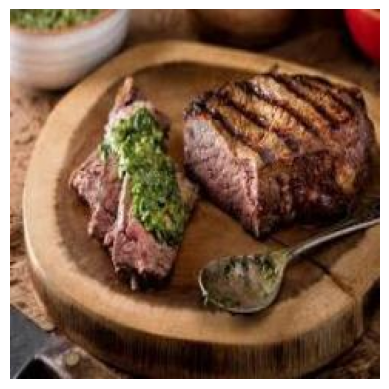

'medium'

In [6]:
plt.imshow(df['image'][75])
plt.axis('off') 
plt.show()
types[df['steak_doneness'][75]]

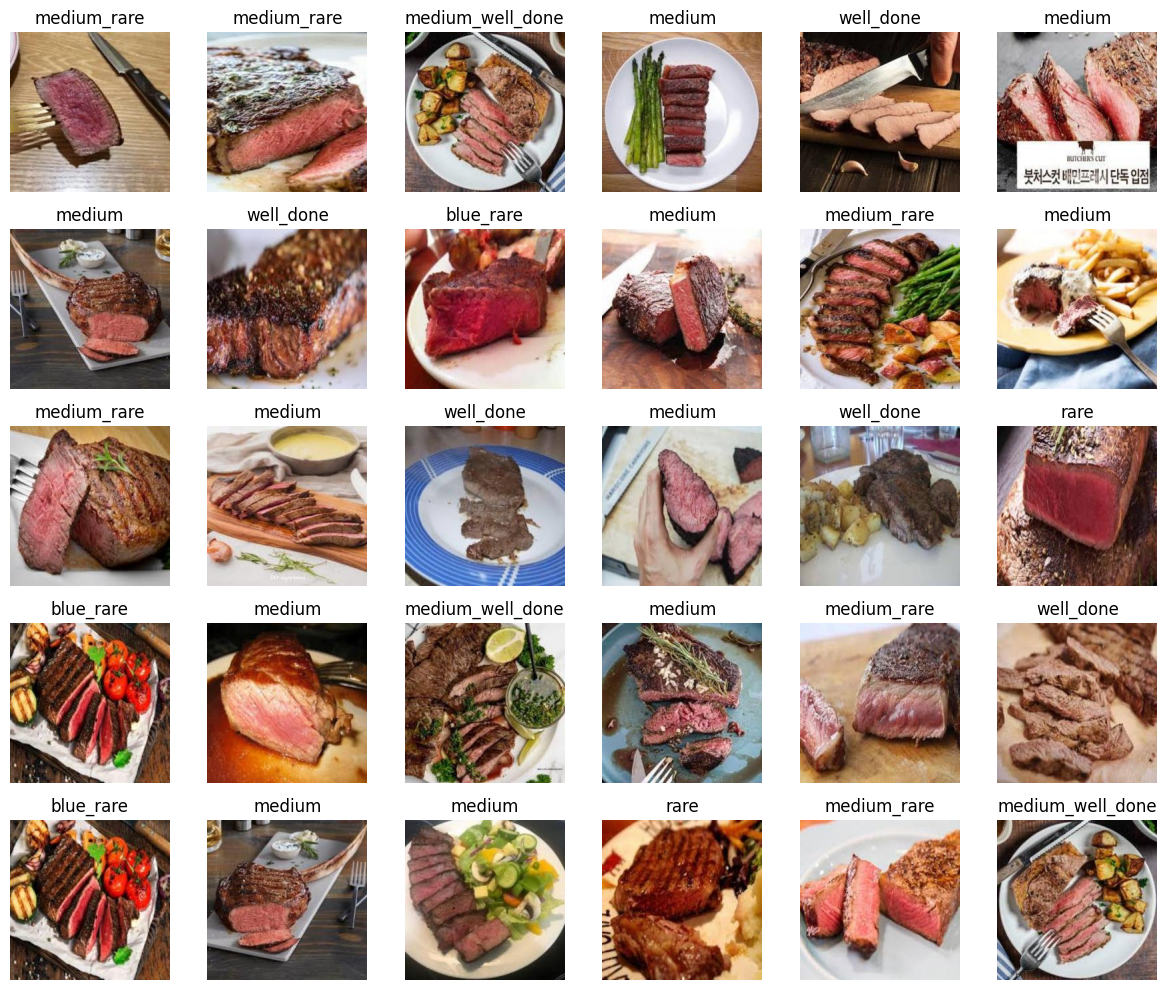

In [40]:
def plot_images():
    fig, axes = plt.subplots(5, 6, figsize=(12, 10))
    axes = axes.flatten()
    for i in range(30):
        random_number = random.randint(1, len(df) - 1)
        axes[i].imshow(df['image'][random_number])
        axes[i].axis('off')
        axes[i].set_title(types[df['steak_doneness'][random_number]])
    
    
    plt.tight_layout()
    plt.show()
plot_images()

In [7]:
shuffled_df = shuffle(df, random_state=42)
shuffled_df.head()
shuffled_df.shape

(873, 2)

In [8]:
steak_doneness_counts = shuffled_df['steak_doneness'].value_counts()
steak_doneness_counts

steak_doneness
3    301
2    184
5    133
4    122
0     73
1     60
Name: count, dtype: int64

In [9]:
X = shuffled_df['image']
y = shuffled_df['steak_doneness']
X

795    [[[0.42745098039215684, 0.4, 0.427450980392156...
319    [[[0.9725490196078431, 0.8705882352941177, 0.8...
382    [[[0.4666666666666667, 0.48627450980392156, 0....
737    [[[0.09019607843137255, 0.08627450980392157, 0...
422    [[[0.01568627450980392, 0.054901960784313725, ...
                             ...                        
106    [[[0.3803921568627451, 0.41568627450980394, 0....
270    [[[0.2823529411764706, 0.2627450980392157, 0.2...
860    [[[0.49019607843137253, 0.3607843137254902, 0....
435    [[[0.0784313725490196, 0.19215686274509805, 0....
102    [[[0.3411764705882353, 0.23137254901960785, 0....
Name: image, Length: 873, dtype: object

In [10]:
y

795    5
319    3
382    2
737    1
422    2
      ..
106    3
270    3
860    5
435    2
102    3
Name: steak_doneness, Length: 873, dtype: object

In [15]:
x_train, x_split, y_train, y_split = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_split, y_split , test_size=0.50, random_state=42)
X_train = torch.from_numpy(np.stack(x_train)).permute(0, 3, 1, 2).float()
Y_train = torch.from_numpy(np.stack(y_train)).long()

X_val = torch.from_numpy(np.stack(x_val)).permute(0, 3, 1, 2).float()
Y_val = torch.from_numpy(np.stack(y_val)).long()

X_test = torch.from_numpy(np.stack(x_test)).permute(0, 3, 1, 2).float()
Y_test = torch.from_numpy(np.stack(y_test)).long()
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)






In [16]:
val_dataset = TensorDataset(X_val, Y_val)
val_loader = DataLoader(val_dataset, batch_size=40, shuffle=True)

test_dataset = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test_dataset, batch_size=40, shuffle=True)

In [17]:
print(f'There are {X_train.shape[0]} training examples')
print(f'There are {x_val.shape[0]} validation examples')
print(f'There are {x_test.shape[0]} test examples')

There are 698 training examples
There are 87 validation examples
There are 88 test examples


In [18]:
print(x_train)
# print(Y_train)
# plt.imshow(x_train[12])
# plt.axis('off') 
# plt.show()
# y_train[12]

45     [[[1.0, 1.0, 0.9921568627450981], [0.882352941...
588    [[[0.3137254901960784, 0.26666666666666666, 0....
156    [[[0.23921568627450981, 0.24705882352941178, 0...
815    [[[0.3568627450980392, 0.33725490196078434, 0....
367    [[[0.5058823529411764, 0.4588235294117647, 0.4...
                             ...                        
778    [[[0.996078431372549, 1.0, 1.0], [0.9960784313...
28     [[[0.996078431372549, 0.996078431372549, 0.988...
330    [[[0.4666666666666667, 0.47843137254901963, 0....
863    [[[0.5843137254901961, 0.5176470588235295, 0.4...
342    [[[0.9882352941176471, 0.8823529411764706, 0.7...
Name: image, Length: 698, dtype: object


In [19]:
df_train = pd.DataFrame({'steak_doneness': y_train})
steak_doneness_counts_train = df_train['steak_doneness'].value_counts()
print("Training Set:")
print(steak_doneness_counts_train)

df_val = pd.DataFrame({'steak_doneness': y_val})
steak_doneness_counts_val = df_val['steak_doneness'].value_counts()
print("\nValidation Set:")
print(steak_doneness_counts_val)

df_test = pd.DataFrame({'steak_doneness': y_test})
steak_doneness_counts_test = df_test['steak_doneness'].value_counts()
print("\nTest Set:")
print(steak_doneness_counts_test)
total_accuracy = []
total_training = []

Training Set:
steak_doneness
3    240
2    146
5    109
4     97
0     58
1     48
Name: count, dtype: int64

Validation Set:
steak_doneness
3    32
2    19
5    11
4    10
0     9
1     6
Name: count, dtype: int64

Test Set:
steak_doneness
3    29
2    19
4    15
5    13
0     6
1     6
Name: count, dtype: int64


## Building the Model

In [136]:
weights_path = os.path.join(cdir, 'weights', 'best_weights_resnet_.pth')   
results_path = os.path.join(cdir, 'results', 'results_resnet_.pth')
def train_model(num_epochs, model, criterion, optimizer, max_loss, train_accuracy_tracker, train_tracker, val_accuracy_tracker, val_tracker, scheduler=None):
    for i in range(num_epochs):
        model.to(device)
        model.train()
        cum_loss = total_correct = total_samples = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            cum_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
                
            # Compute accuracy
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            # print(f'Accuracy : {total_correct/total_samples}')
        if cum_loss / len(train_loader) < max_loss:
            torch.save({
                'epoch': i,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': cum_loss / len(train_loader),
                }, weights_path)
            max_loss = cum_loss/len(train_loader)
        accuracy = total_correct / total_samples
        train_accuracy_tracker.append(accuracy)
        train_tracker.append(cum_loss/len(train_loader))
        print(f"Epoch({i+1}/{num_epochs}) | Train loss: {cum_loss/len(train_loader)} | Train Accuracy: {accuracy} | ", end="")
        # scheduler.step()
        #validation
        model.to('cpu')
        model.eval()
        cum_loss = total_correct = total_samples = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to('cpu'), labels.to('cpu')
            outputs = model(inputs)
            predicted_outputs = torch.argmax(outputs, dim=1)
            is_correct = (labels == predicted_outputs).int()
            # for i, check in enumerate(is_correct):
            #     print(i, check)
            #     if not check:
            #         plt.imshow(inputs[i].permute(1, 2, 0))
            #         plt.axis('off') 
            #         plt.show()
            #         print(types[predicted_outputs[i].item()])
            #         print(types[labels[i].item()])
            
            loss = criterion(outputs, labels)
            cum_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
                
            # Compute accuracy
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            # print(f'Accuracy : {total_correct/total_samples}')
        accuracy = total_correct / total_samples
        val_accuracy_tracker.append(accuracy)
        val_tracker.append(cum_loss/len(val_loader))
        print(f'Val loss: {cum_loss/len(val_loader)} | Val Accuracy: {accuracy}')
    torch.save({'train_accuracy_tracker': train_accuracy_tracker, 'train_tracker': train_tracker, 'val_accuracy_tracker': val_accuracy_tracker, 'val_tracker': val_tracker}, results_path) 
    # return train_accuracy_tracker, train_tracker, val_accuracy_tracker, val_tracker

In [137]:
# 180 epochs at .001 lr, 
# 80 epochs at lr=0.0001
num_epochs = 30
try:
    model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V2)
    for param in model.parameters():
        param.requires_grad = False
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 6)
    checkpoint = torch.load(weights_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.fc.parameters(), lr=0.0001, momentum=0.9)
    # exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=80, gamma=0.1)
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    max_loss = checkpoint['loss']
    curr_results = torch.load(results_path)
    train_accuracy_tracker = curr_results['train_accuracy_tracker']
    train_tracker = curr_results['train_tracker']
    val_accuracy_tracker = curr_results['val_accuracy_tracker']
    val_tracker = curr_results['val_tracker']
    print("finished loading")
except:
    model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V2)
    for param in model.parameters():
        param.requires_grad = False
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 6)
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
    # exp_lr_scheduler = optim.lrr_scheduler.StepLR(optimizer, step_size=80, gamma=0.1)
    max_loss = float('inf')
    train_accuracy_tracker = []
    train_tracker = []
    val_accuracy_tracker = []
    val_tracker = []

finished loading


In [138]:
train_model(num_epochs, model, criterion, optimizer, max_loss, train_accuracy_tracker, train_tracker, val_accuracy_tracker, val_tracker)

Epoch(1/30) | Train loss: 0.3199114447290247 | Train Accuracy: 0.9828080229226361 | 

KeyboardInterrupt: 

In [29]:
# weights_path = os.path.join(cdir, 'weights', 'best_weights2.pth')
def val_model(model):
    criterion = nn.CrossEntropyLoss()
    val_tracker, accuracy_tracker = [], []
    # for i in range(num_epochs):
    model.to('cpu')
    model.eval()
    cum_loss = total_correct = total_samples = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        outputs = model(inputs)
        predicted_outputs = torch.argmax(outputs, dim=1)
        is_correct = (labels == predicted_outputs).int()
        # for i, check in enumerate(is_correct):
        #     print(i, check)
        #     if not check:
        #         plt.imshow(inputs[i].permute(1, 2, 0))
        #         plt.axis('off') 
        #         plt.show()
        #         print(types[predicted_outputs[i].item()])
        #         print(types[labels[i].item()])
        
        loss = criterion(outputs, labels)
        cum_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
            
        # Compute accuracy
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        print(f'Accuracy : {total_correct/total_samples}')
    accuracy = total_correct / total_samples
    accuracy_tracker.append(accuracy)
    val_tracker.append(cum_loss/len(train_loader))
    print(f"Validation loss: {cum_loss/len(train_loader)} | Accuracy: {accuracy}")
    return accuracy_tracker, val_tracker

In [30]:
accuracy, validating = val_model(model)
print(accuracy)
print(validating)

NameError: name 'model' is not defined

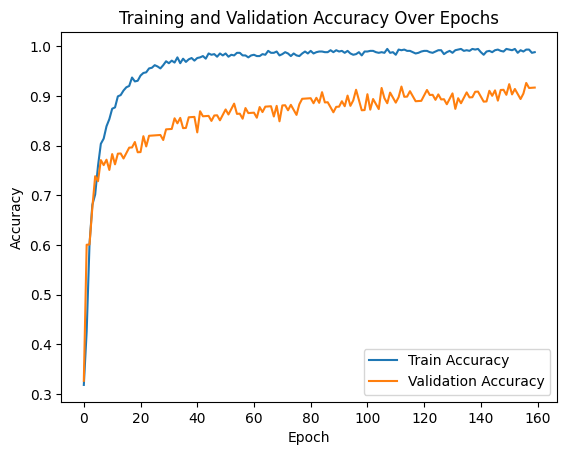

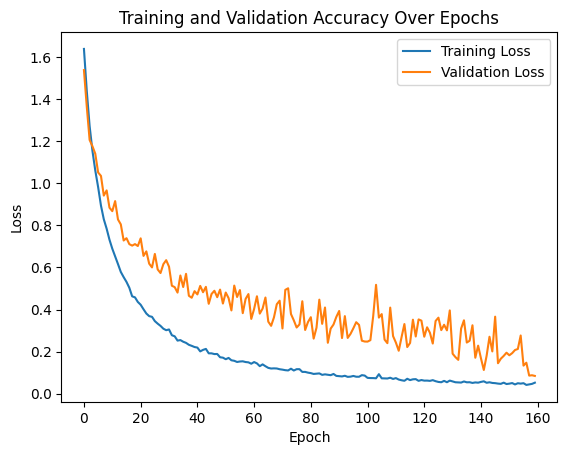

In [98]:
results_path = os.path.join(cdir, 'results', 'best_results.pth')
results= torch.load(results_path)
results.keys()

train_accuracy_tracker = results['train_accuracy_tracker']
train_tracker = results['train_tracker']
val_accuracy_tracker = results['val_accuracy_tracker']
val_tracker = results['val_tracker']
plt.plot(train_accuracy_tracker, label = 'Train Accuracy')
plt.plot(val_accuracy_tracker, label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')


plt.legend()

plt.show()

plt.plot(train_tracker, label='Training Loss')
plt.plot(val_tracker, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Over Epochs')


plt.legend()

plt.show()


In [100]:
def test_model(model):
    fig, axes = plt.subplots(5, 6, figsize=(12, 10))
    axes = axes.flatten()
    criterion = nn.CrossEntropyLoss()
    test_tracker, test_accuracy_tracker = [], []
    # for i in range(num_epochs):
    model.to('cpu')
    model.eval()
    cum_loss = total_correct = total_samples = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        outputs = model(inputs)
        predicted_outputs = torch.argmax(outputs, dim=1)
        is_correct = (labels == predicted_outputs).int()
        j = 0
        for i, check in enumerate(is_correct):
            if not check and j < 30:
                actual = types[labels[i].item()]
                guess = types[predicted_outputs[i].item()]
                axes[j].imshow(inputs[i].permute(1, 2, 0))
                axes[j].axis('off')
                axes[j].set_title(f"{types[labels[i].item()]}\n{types[predicted_outputs[i].item()]}")
                j+= 1
    
        loss = criterion(outputs, labels)
        cum_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        # Compute accuracy
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        # print(f'Accuracy : {total_correct/total_samples}')    
    plt.tight_layout()
    plt.show()
    accuracy = total_correct / total_samples
    test_accuracy_tracker.append(accuracy)
    test_tracker.append(cum_loss/len(test_loader))
    print(f"Test loss: {cum_loss/len(train_loader)} | TestAccuracy: {accuracy}")

In [50]:
def test_selected_model(model_file):
    # weights_path = os.path.join(cdir, 'weights', pth_file)   
    # print(weights_path)
    model = torch.load(model_file) 
    # model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V2)
    # for param in model.parameters():
    #     param.requires_grad = False
    # num_ftrs = model.fc.in_features
    # model.fc = nn.Linear(num_ftrs, 6)
    # checkpoint = torch.load(weights_path)
    # model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    # print()
    test_model(model)

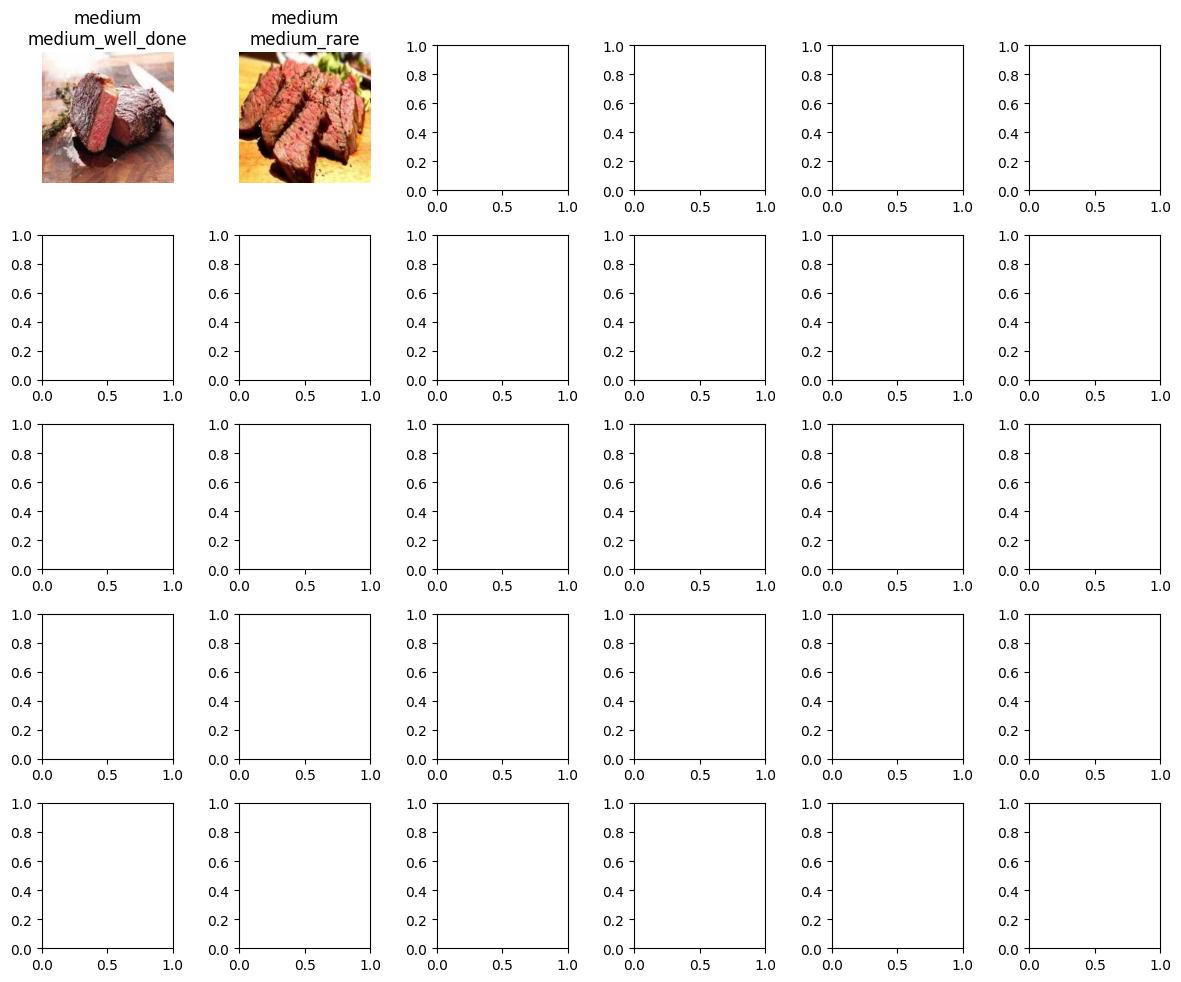

Test loss: 0.009790118360383944 | TestAccuracy: 0.9659090909090909


In [101]:
test_selected_model("model/model_1.pth")

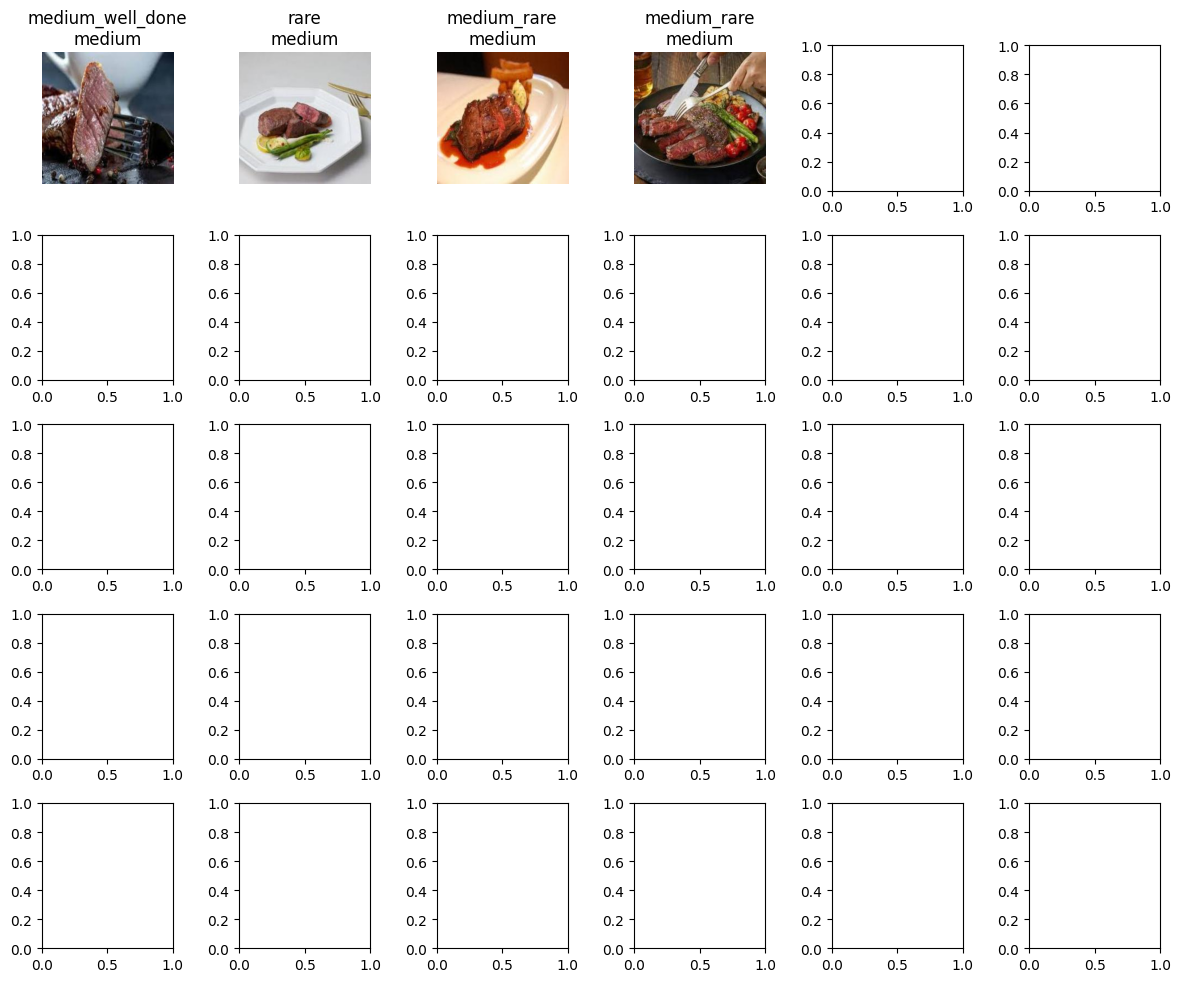

Test loss: 0.0315064777281474 | TestAccuracy: 0.9204545454545454


In [102]:
test_selected_model("model/model_2.pth")

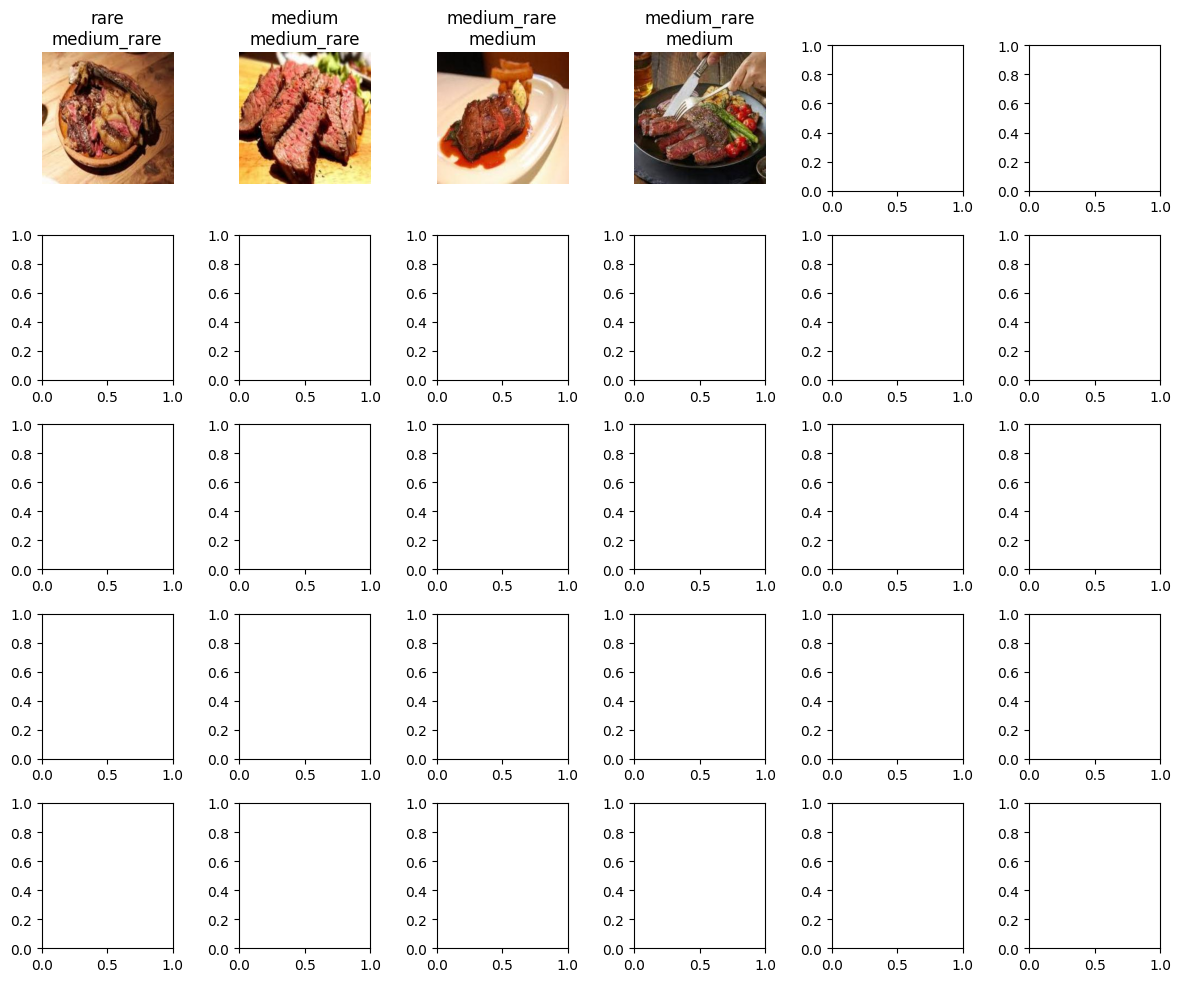

Test loss: 0.031048155728388916 | TestAccuracy: 0.9204545454545454


In [103]:
test_selected_model("model/model_3.pth")